In [46]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


In [47]:
# 加载数据集（使用Iris数据集作为例子）
iris = pd.read_csv('data\iris.csv')  #读取数据文件
X = iris.iloc[:, :4].values  #获得样本数据
y = iris.iloc[:,-1].values   #获得样本的类标签

#1. 获得PCA降维到2维后的数据,保存在data_pca中
#补充你的代码


print('PCA降维:\n',data_pca)



PCA降维:
 [[-2.26470281 -0.4800266 ]
 [-2.08096115  0.67413356]
 [-2.36422905  0.34190802]
 [-2.29938422  0.59739451]
 [-2.38984217 -0.64683538]
 [-2.07563095 -1.48917752]
 [-2.44402884 -0.0476442 ]
 [-2.23284716 -0.22314807]
 [-2.33464048  1.11532768]
 [-2.18432817  0.46901356]
 [-2.1663101  -1.04369065]
 [-2.32613087 -0.13307834]
 [-2.2184509   0.72867617]
 [-2.6331007   0.96150673]
 [-2.1987406  -1.86005711]
 [-2.26221453 -2.68628449]
 [-2.2075877  -1.48360936]
 [-2.19034951 -0.48883832]
 [-1.898572   -1.40501879]
 [-2.34336905 -1.12784938]
 [-1.914323   -0.40885571]
 [-2.20701284 -0.92412143]
 [-2.7743447  -0.45834367]
 [-1.81866953 -0.08555853]
 [-2.22716331 -0.13725446]
 [-1.95184633  0.62561859]
 [-2.05115137 -0.24216355]
 [-2.16857717 -0.52714953]
 [-2.13956345 -0.31321781]
 [-2.26526149  0.3377319 ]
 [-2.14012214  0.50454069]
 [-1.83159477 -0.42369507]
 [-2.61494794 -1.79357586]
 [-2.44617739 -2.15072788]
 [-2.10997488  0.46020184]
 [-2.2078089   0.2061074 ]
 [-2.04514621 -0.661

In [48]:

# KNN算法类定义
class KNN:
    def __init__(self, k=3):
        self.k = k  # 设置邻居数目    

    # 存储训练数据
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    #2. 计算欧氏距离
    def euclidean_distance(self, point1, point2):
        #补充你的代码

    #3. 预测一组数据点的类别
    def predict(self, X_test):
        predictions = []

        #补充你的代码
        
        return np.array(predictions)

In [49]:
# 数据集划分，80%训练集，20%测试集
X_train, X_test, y_train, y_test = train_test_split(data_pca, y, test_size=0.2, random_state=42)

# 初始化KNN模型并训练
knn = KNN(k=3)
knn.fit(X_train, y_train)

# 对测试集进行预测
y_pred = knn.predict(X_test)

# 打印预测结果
print("预测结果：", y_pred)
print("真实标签：", y_test)


预测结果： ['versicolor' 'setosa' 'virginica' 'versicolor' 'virginica' 'setosa'
 'versicolor' 'virginica' 'virginica' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa']
真实标签： ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa']


In [50]:
from sklearn.metrics import accuracy_score, classification_report

# 评估分类器的性能
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=np.unique(y)))

Accuracy: 0.9333333333333333
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.78      0.88         9
   virginica       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [ ]:
#4. 参与测试的数据中，每类各有几个？



#5. 针对上述预测结果，具体解释三类测试数据中各有几个被预测错了，被错误预测为哪类？



#6. 分别给出versicolor类的recall,virginica类的precision的计算公式




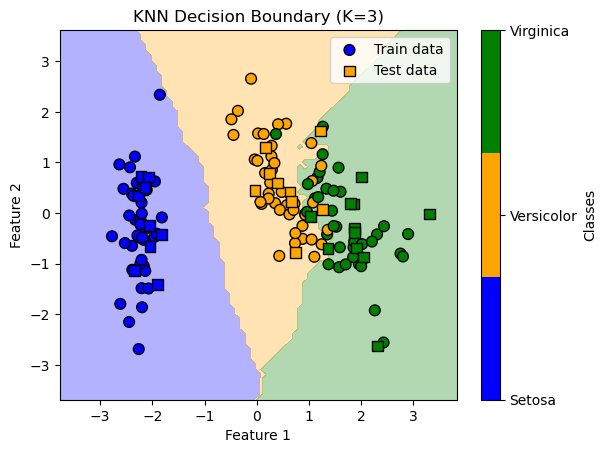

In [51]:

# 可视化

# 创建网格用于绘制决策边界
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

label_map = {'setosa': 0, 'versicolor': 1, 'virginica': 2}

# 批量预测网格上的类别
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = knn.predict(grid_points)
Z_mapped = np.vectorize(label_map.get)(Z)  # 映射为数字标签

# 将 Z 数组重塑为网格形状
Z_mapped = Z_mapped.reshape(xx.shape)

# 使用 label_map 将 y_train 和 y_test 映射为数字
y_train_mapped = np.vectorize(label_map.get)(y_train)
y_test_mapped = np.vectorize(label_map.get)(y_test)

# 自定义颜色映射，只使用3种颜色，直接使用颜色名称
colors = ['blue', 'orange', 'green']  # Setosa, Versicolor, Virginica
cmap = mcolors.ListedColormap(colors)

# 绘制决策边界
plt.contourf(xx, yy, Z_mapped, alpha=0.3, cmap=cmap, levels=np.arange(-0.5, 3.5, 1))

# 绘制训练数据点
scatter_train = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train_mapped, marker='o', edgecolor='k', s=60, cmap=cmap, label='Train data')

# 绘制测试数据点
scatter_test = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_mapped, marker='s', edgecolor='k', s=60, cmap=cmap, label='Test data')

# 设置坐标轴标签和标题
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Decision Boundary (K=3)')

# 自动生成图例
plt.legend()

# 获取 colorbar
cbar = plt.colorbar(scatter_train, label='Classes')

# 设置色条的刻度为三个类别，分别为 0, 1, 2（对应 Setosa, Versicolor, Virginica）
cbar.set_ticks([0, 1, 2])  # 设置为三个类别的刻度
cbar.set_ticklabels(['Setosa', 'Versicolor', 'Virginica'])  # 设置对应的标签

# 显示图形
plt.show()
